# **Assignment 3** #

**Delivery Instructions**:  Similar to assignment 2. See this [**Canvas announcement**](https://njit.instructure.com/courses/11882/discussion_topics/42914) for more details. 



### **Q1. A task scheduling problem** ###

The input for this problem is a set of $n$ tasks. Task $i$ has a start time and and end time $(s_i, t_i)$. The goal is to complete the **maximum possible number of tasks** under this constraint: if we choose to perform some task $i$, then no other task that overlaps with it can be performed. Or in other words, if a task starts or ends between $s_i$ and $t_i$, then it cannot be performed. 

**(i)** For this problem you should give an algorithm that returns a set of tasks whose number is the maximum possible that can be performed. You should target a algorithm that keeps augmenting a list of tasks by a simple 'greedy' criterion. Please describe your algorithm in text cell.  

**(ii)** You should also give an implementation of the algorithm. You can assume that the input is given in the format specified in the following code cell.











In [11]:

Tasks = [(1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11), (8, 12), (2, 13), (12, 14)]

#https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm

your algorithm description goes here
### Description
I attempted several approaches but for each, a basic loop that does:
1. select item based upon "rule"
1. eliminate all other items that conflict -- which is:
    `i` is the chosen task; `j` is the task being evaluated for conflict:
    - $   s(i) < s(j) < f(i) OR f(i) > f(j) > s(i) $
1. continue back on rule selection

The approaches I looked at:
- lowest start and shortest time (together)
- smallest interval
- earliest start time
- earliest finish time

I ended up with `earliest finish time`


In [12]:
import numpy as np

Tasks = [(1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11), (8, 12), (2, 13), (12, 14)]

def tasks_order(Tasks):
    rv = []
    t2 = np.array(Tasks)
    sorted_tasks = t2[t2[:,1].argsort()]
    
    while len(sorted_tasks) > 0:
        #get the first tasks as it is the earliest
        choice = sorted_tasks[0:1, :]
        si = choice[0][0]
        fi = choice[0][1]
        #append it to the return value
        rv.append((si,fi))
        #remove it from the list -- redundant as filter below accomodates.
        #sorted_tasks = sorted_tasks[1:, :]
        #select remaining tasks that start is greater than THIS finish
        sorted_tasks = sorted_tasks[ ((sorted_tasks[:,0] > fi)) ]

    return rv
    
    
tasks_order(Tasks)


[(1, 4), (5, 7), (8, 11), (12, 14)]

### **Q2. A Heap with composite values**

**(i)** The heap class we discussed in lecture 2 implicitly assumes that the heap stores only **keys** (numbers). However, as we discussed, we may want to store composite elements that contain values along with the keys. In this question you are asked to modify the following implementation of the class in order to handle elements that are assumed to have a special **key** field. You can demonstrate this on the *heapInsert* function -- the max extraction function will be very similar. 

**(ii)** You can see Lecture-3 notebook to see how part (i) is done when the data structure is a simple list. This list was used for a suboptimal implementation of Prim's MST algorithm. Assuming you have a modified class from part (i), how would you modify Prim's implementation in order to get an $O(n \log n)$ running time? Please give a short answer in a text cell. 



In [13]:
class myMaxHeap:
  def __init__(self):
    self.H = []


  def heapInsert(self,x):
    n = len(self.H)
    self.H.append(x)   # append in last leaf (next available position in array/list)
    
    # now bubble up x
    pos = n;      # current position of bubble-up
    while True:
      parent_pos = (pos-1)//2 
      if self.H[parent_pos] < self.H[pos]:  
        self.H[pos] = self.H[parent_pos]     # copy parent value to current position
        self.H[parent_pos] = x               # move x to parent's position
        pos = parent_pos                     # update current position
      else:
        break                                # break the bubble-up loop
    # return H    

*your description of the problem goes here*


## Q2 (i) --- answer

In [14]:
# your code correction goes here

## here using named tuples

import collections
kv = collections.namedtuple('kv', 'key value')

class myMaxHeap:
    def __init__(self):
        self.H = []

    def heapInsert(self, x: kv):  #using type decorators
        n = len(self.H)
        # append in last leaf (next available position in array/list)
        self.H.append(x)

        # now bubble up x
        pos = n      # current position of bubble-up
        while True:
            if pos == 0:
                break
            parent_pos = (pos-1)//2
            #cast and obtain the key for comparison
            if kv(*self.H[parent_pos]).key < kv(*self.H[pos]).key:
                # copy parent value to current position
                self.H[pos] = self.H[parent_pos]
                # move x to parent's position
                self.H[parent_pos] = x
                pos = parent_pos                     # update current position
            else:
                break                                # break the bubble-up loop
        # return self.H




## Q2 (ii) --- answer

>> the edgeMax class can be implemented using a max heap. As the primary operation `max_edge = H.extractMax()` - this could be a simple O(log n) operation.



### **Q3. Augmented heap for insertion performance tracking**

**(i)** Give a modification of *class myMaxHeap* to include the following attribute: 

*   *n_comparisons*: The number of comparisons that *heapInsert* performed since the initialization of the heap instance. 

**(ii)** Suppose that you want to insert in a heap the numbers $1,\ldots, n$. In what sequence should you insert them in order to cause the maximum possible number of comparisons in *heapInsert* ? What is the asymptotic number of comparisons as a function of $n$?

**(iii)** Describe and implement an insertion sequence that will make the number of comparisons significantly smaller. (Hint: think random)

**(iv)** Use the modified class from part (i) in order to count exactly the number of comparisons for the two strategies in (ii) and (iii). Do that for $n=10^2, 10^4, 10^6$, and report the numbers. 





*your algorithm description goes here*

In [15]:
# your code goes here

## Q3 (i)

import collections
kv = collections.namedtuple('kv', 'key value')

class myMaxHeap:
    def __init__(self):
        self.H = []
        self.K = 0  #keep track of comparitions

    def heapInsert(self, x: kv):  #using type decorators
        n = len(self.H)
        # append in last leaf (next available position in array/list)
        self.H.append(x)

        # now bubble up x
        pos = n      # current position of bubble-up
        while True:
            if pos == 0:
                break
            parent_pos = (pos-1)//2
            #cast and obtain the key for comparison
            if kv(*self.H[parent_pos]).key < kv(*self.H[pos]).key:
                self.K += 1. #add another comparison to the net total since create.
                # copy parent value to current position
                self.H[pos] = self.H[parent_pos]
                # move x to parent's position
                self.H[parent_pos] = x
                pos = parent_pos                     # update current position
            else:
                break                                # break the bubble-up loop
        # return self.H
        
    @property
    def total_comparisons(self):
        return self.K
    
    @property
    def heap(self):
        return self.H

## Answer: Question 3 (ii)
> insert lowest first, as each append is the "bottom" or last leaf - which forces a comparison max amount of times on each bubble up.


## Answer: Question 3 (iii)
> thinking random, using the input list, randoming pick from the inbound list, assuming it's sorted ascending as described and it is NOT equential.



In [16]:
import random
newHeap = myMaxHeap()

inbound_list = [1,2,3,4,5,99]

random.shuffle(inbound_list)  #in place random shufflt

for i in range(len(inbound_list)):
    newHeap.heapInsert( (inbound_list[i], inbound_list[i]))
    
    
newHeap.heap

[(99, 99), (5, 5), (4, 4), (1, 1), (3, 3), (2, 2)]

In [17]:
import random
random.seed(42)

def time_heap_compares(p, shuffle = False):
    h = myMaxHeap()
    l = range(pow(10,p))
    if shuffle:
        l2 = []
        for i in l:
            l2.append((i,i))
            
        random.shuffle(l2)
            
        l = l2
    
    for a in l:
        h.heapInsert( (a,a))
        
    return h.K

print('time sequence: 10^{} : {}'.format(2, time_heap_compares(2)))
print('time sequence: 10^{} : {}'.format(4, time_heap_compares(4)))
print('time sequence: 10^{} : {}'.format(6, time_heap_compares(6)))


print('time sequence random: 10^{} : {}'.format(2, time_heap_compares(2, True)))
print('time sequence random: 10^{} : {}'.format(4, time_heap_compares(4, True)))
print('time sequence randome: 10^{} : {}'.format(6, time_heap_compares(6, True)))


time sequence: 10^2 : 480.0
time sequence: 10^4 : 113631.0
time sequence: 10^6 : 17951445.0
time sequence random: 10^2 : 118.0
time sequence random: 10^4 : 12763.0
time sequence randome: 10^6 : 1281845.0


In [18]:
#reduction in compares...
print( (480-118)/480)
print((113631 - 12763)/113631)
print((17951445 - 1281845)/17951445)



0.7541666666666667
0.8876802985100897
0.928593770585042


### **Q4. Manual construction of a Huffman Tree**

In Lecture 3 we discussed a specific example of how to build a Huffman prefix tree for a set of input numbers. Recall that the algorithm starts from different one-node trees and then keeps merging two trees until it is left with only one tree. In this exercise you are asked to use the Node class contained in lecture-3 notebook and build a tree following exactly the merges that we saw in the lecture. The final outcome should be a single variable of the *Node* class, that contains the entire tree. (Hint: The pseudocode in the lecture notes may be useful)




In [19]:
import heapq #this is a min heap implementation.


class Node:
    def __init__(self,key):
        self.key = key
        self.lchild = None
        self.rchild = None
    
    # defining comparators less_than and equals
    def __lt__(self, other):
        return self.key < other.key

    def __eq__(self, other):
        if(other == None):
            return False
        if(not isinstance(other, Node)):
            return False
        return self.freq == other.freq
    
    
F = [45, 13, 12, 16, 9, 5]
    
# create six different trees

t_a = Node(45000)
t_b = Node(13000)
t_c = Node(12000)
t_d = Node(16000)
t_e = Node(9000)
t_f = Node(5000)

H = []

for j in range(len(F)):
    z = Node(F[j])
    H.append(z)
    

heapq.heapify(H)



# merge two trees (x5)

for j in range(len(H) - 1):
    x = heapq.heappop(H)
    y = heapq.heappop(H)
    z = Node(x.key + y.key)
    z.lchild = x
    z.rchild = y
    heapq.heappush(H,z)


    
def print_nodes(n):
    print('Node: {}  lchild: {}   rchild: {}'.format(n.key, 
                                                     n.lchild.key if n.lchild is not None else '-', 
                                                     n.rchild.key if n.rchild is not None else '-'))
    if n.lchild is not None:
        print_nodes(n.lchild)
    if n.rchild is not None:
        print_nodes(n.rchild)
        

    

    
print_nodes(H[0])

Node: 100  lchild: 45   rchild: 55
Node: 45  lchild: -   rchild: -
Node: 55  lchild: 25   rchild: 30
Node: 25  lchild: 12   rchild: 13
Node: 12  lchild: -   rchild: -
Node: 13  lchild: -   rchild: -
Node: 30  lchild: 14   rchild: 16
Node: 14  lchild: 5   rchild: 9
Node: 5  lchild: -   rchild: -
Node: 9  lchild: -   rchild: -
Node: 16  lchild: -   rchild: -


# Scratch and supporting work


## question 1
Here I plot the various tasks, sorting by the starting time, vertex 0, of each **task**

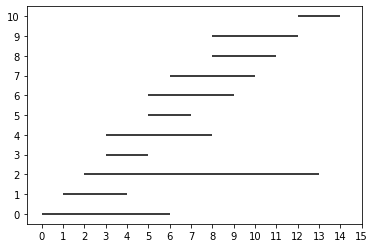

In [20]:
import matplotlib.pyplot as plt

def to_xy(events):
    x1, x2, y = [], [], []
    for i, e in enumerate(sorted(events, key = lambda x: x[0])):
        x1.append(e[0])
        x2.append(e[1])
        y.append(i)
    return x1, x2, y

def plot_events(x1, x2, y):
    plt.hlines(y, xmin=x1, xmax=x2)
    plt.yticks(range(max(y) + 1))
    plt.xticks(range(max(x2) + 2))
    plt.show()

    
tasks =  [(1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11), (8, 12), (2, 13), (12, 14)]
x1, x2, y = to_xy(tasks) #(A,B,C)
plot_events(x1,x2, y)